In [1]:
from __future__ import print_function
from six.moves import range
import numpy as np
import scipy as sp
import random
random.seed(2001)
import scipy.io
import matplotlib.pyplot as plt
import glob as glob



/home/charles/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/charles/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
def fetch_data(files, slice_range):
    #randomly pick test_percent of folders
    num = len(files)
    XY_Data = list()
    
    for f in files:
        Xy_tr = np.load(f)
        trimed_data = None
        if slice_range != 0:                    
            num_of_slices = Xy_tr[-1, 785] #number of slices
            start_slice =np.floor(num_of_slices/2) - np.floor(slice_range/2) 
            end_slice = start_slice + slice_range
            start_indices = Xy_tr[:, 785] >= start_slice
            end_indices = Xy_tr[:, 785] <= end_slice
            intercept = start_indices & end_indices        
            trimed_data = Xy_tr[intercept]
        else:
            trimed_data = Xy_tr        
        if len(XY_Data) == 0:
            XY_Data = trimed_data
        else:
            XY_Data = np.append(XY_Data, trimed_data, axis =0)
    return XY_Data

In [3]:
def fetch_data_for_minus(files, slice_range):
    #randomly pick test_percent of folders
    num = len(files)
    XY_Data = list()
    
    for f in files:
        Xy_tr = np.load(f)
        trimed_data = None
        if slice_range != 0:                    
            num_of_slices = Xy_tr[-1, 785] #number of slices
            start_slice =np.floor(num_of_slices/2) - np.floor(slice_range/2) 
            end_slice = start_slice + slice_range
            start_indices = Xy_tr[:, 785] >= start_slice
            end_indices = Xy_tr[:, 785] <= end_slice
            intercept = start_indices & end_indices        
            trimed_data = Xy_tr[intercept]
        else:
            trimed_data = Xy_tr        
        if len(XY_Data) == 0:
            XY_Data = trimed_data
        else:
            XY_Data = np.append(XY_Data, trimed_data, axis =0)
    return XY_Data

In [4]:
data_files = './minus_data/rescaled_minus/'
all_files = glob.glob(data_files+'/*.npy')
all_files = sorted(all_files)  #load the number of folders indicated in the slice.... loading all will require more memory
print (len(all_files))

30


In [8]:
np.save("./minus_data/Processed_data/XY_Dataset_28_28_with_minus_1", XY_Data_All_with_minus)

In [7]:
data_files = './'
all_files = glob.glob(data_files+'/*.npy')
all_files = sorted(all_files)  #load the number of folders indicated in the slice.... loading all will require more memory
print (len(all_files))

30


In [8]:
XY_Data_All_with_minus= fetch_data(all_files, 0)

In [9]:
print (XY_Data_All_with_minus.shape)

(49439, 786)


(1, 772) (1, 48667)


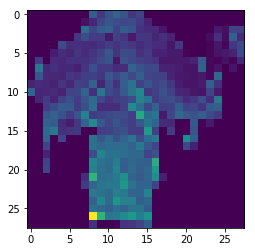

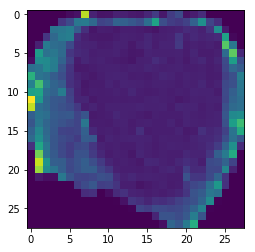

In [10]:
ones = np.where(XY_Data_All_with_minus[:, 784]==1)
zeros = np.where(XY_Data_All_with_minus[:, 784]==0)

print(np.shape(ones), np.shape(zeros))

all_ones = XY_Data_All_with_minus[ones]
all_zeros = XY_Data_All_with_minus[zeros]
plt.imshow(all_ones[10, :784].reshape(28,28))
plt.figure()
plt.imshow(all_zeros[400, :784].reshape(28,28))
      

In [11]:
num_classes = 2
X = XY_Data_All_with_minus[:, :784]
y = XY_Data_All_with_minus[:, 784].astype(np.int)

sss = StratifiedShuffleSplit(y, 3, test_size=0.5, random_state=0)
print (sss)
for train_index, test_index in sss:
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


# y_train = np_utils.to_categorical(y_train, num_classes)
# y_test = np_utils.to_categorical(y_test, num_classes)

# datagen = ImageDataGenerator(
#     featurewise_center=True,
#     featurewise_std_normalization=True,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True)

# # compute quantities required for featurewise normalization
# # (std, mean, and principal components if ZCA whitening is applied)
# datagen.fit(x_train)


StratifiedShuffleSplit(labels=[1 0 0 ... 0 0 0], n_iter=3, test_size=0.5, random_state=0)
TRAIN: [27329  4926 17557 ...  9954 46489 46194] TEST: [10981 45135  3524 ... 38679  2579 46621]
TRAIN: [29675 40645  5365 ... 19629  6671  6405] TEST: [18068  4997 45867 ... 36667 22171 45718]
TRAIN: [ 5131 39451 43746 ... 18165 43700  4678] TEST: [18413 20191 46755 ... 16045 44979 25763]
